# Student Admission Prediction using Logistic Regression

We will build a logistic regression model to
predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision.

In [ ]:
# Import data from drive
from google.colab import files
uploaded = files.upload()

Saving ex2data1.txt to ex2data1.txt


In [ ]:
# Load text file into a pandas dataframe
import pandas as pd
df = pd.read_csv('ex2data1.txt', sep=',', header=None, names=['Exam1 Score','Exam2 Score','Result'])
print(df.head())

   Exam1 Score  Exam2 Score  Result
0    34.623660    78.024693       0
1    30.286711    43.894998       0
2    35.847409    72.902198       0
3    60.182599    86.308552       1
4    79.032736    75.344376       1


In [ ]:
df.describe()

,Exam1 Score,Exam2 Score,Result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


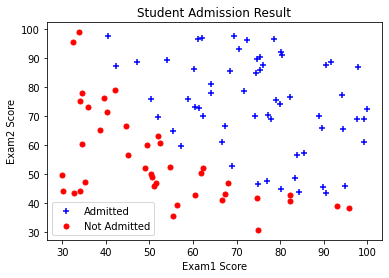

In [ ]:
# Plotting the data
import numpy as np
import matplotlib.pyplot as plt

'''
x (ndarray) - (m,n) : matrix of m examples with n features
y (ndarray) - (m,1) : target values
'''

data = df.values
x = np.array(data[:,:2])
y = np.array(data[:,2]).reshape(np.size(x,0),1)

def Plot_Data(x,y):
  x_pos = np.where(y==1)
  x_neg = np.where(y==0)
  x_pos = x_pos[0].tolist()
  x_neg = x_neg[0].tolist()
  x_A = x[x_pos,:]
  x_B = x[x_neg,:]
  plt.figure()
  plt.title('Student Admission Result')
  plt.xlabel('Exam1 Score')
  plt.ylabel('Exam2 Score')
  plt.scatter(x_A[:,0], x_A[:,1], s=45, c='b', marker='+')
  plt.scatter(x_B[:,0], x_B[:,1], s=25, c='r', marker='o')
  plt.legend(['Admitted', 'Not Admitted'])
  return

Plot_Data(x,y)

In [ ]:
# Sigmoid Function
def sigmoid(z):
  sig= 1/(1+ np.exp(-z))
  return sig

sigmoid(0)

0.5

In [ ]:
# Initializing the parameters
import copy
'''
w (scalar)     : prediction parameter
b (scalar)     : prediction parameter
iters          : number of iterations
alpha          : learning rate
'''
w_int = np.zeros((np.size(x,1),1))
b_int = 0
iters = 400
alpha = 0.1

In [ ]:
# Computing Cost Function
def Compute_Cost(x,y,w,b):
  '''
   J (scalar): cost 
  '''

  J = 0
  m = np.size(x,0)
  w = copy.deepcopy(w)
  
  z = np.dot(x,w) + b
  g_x = sigmoid(z)
  J = - np.multiply(y,np.log(g_x)) - np.multiply((1-y),np.log(1-g_x))
  J = np.sum(J)/m
  return J

Compute_Cost(x,y,w_int,b_int)

0.6931471805599453

In [ ]:
# Compute the Gradient
def Compute_Gradient(x,y,w,b):
  '''
  dw (scalar) : Gradient of the cost w.r.t parameter w
  db (scalar) : Gradient of the cost w.r.t parameter b 
  '''

  dw = 0
  db = 0
  m,n = x.shape

  z = np.dot(x,w) + b
  err = sigmoid(z) - y
  dw = np.transpose(x) @ err/m
  db = np.sum(err)/m
  
  return dw, db

Compute_Gradient(x,y,w_int,b_int)

(array([[-12.00921659],
        [-11.26284221]]), -0.1)

In [ ]:
# Testing on non-zero parameters

wt = np.array([[0.2],[0.2]])
bt = -24
Ct = Compute_Cost(x,y,wt,bt)
gt = Compute_Gradient(x,y,wt,bt)
print(Ct)
print(gt)

0.21833019382659777
(array([[2.56623412],
       [2.64679737]]), 0.04290299489953447)


In [ ]:
# Compute Gradient Descent
def Gradient_Descent(x,y,w,b, iters, alpha):
  J_hist = []

  for i in range(iters):
    dw, db = Compute_Gradient(x,y,w,b)
    w = w - alpha * dw
    b = b - alpha * db
    J_hist.append(Compute_Cost(x,y,w,b))

  return w, b, J_hist

In [ ]:
alpha = 0.001
w, b, J_hist = Gradient_Descent(x,y,wt,bt, iters, alpha)
# 
print("Cost at theta found: ", Compute_Cost(x,y,w,b))
print("w: ", w.flatten())
print("b: ", b)

Cost at theta found:  0.20370644419350709
w:  [0.19694609 0.19207535]
b:  -24.00023629478729


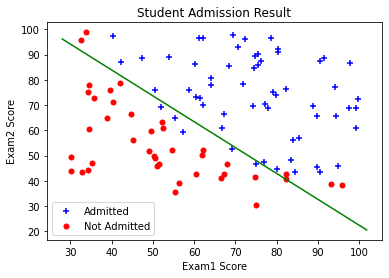

In [ ]:
# Plot Decision Boundary

def Plot_Decision_Boundary(x,y,w,b):
  
  x = copy.deepcopy(x)
  w = copy.deepcopy(w)

  Plot_Data(x,y)
  plot_x = [np.min(x)-2,np.max(x)+2]
  plot_y = (-1/ w[1]) * (w[0]*plot_x + b) 
  plt.plot(plot_x, plot_y, c='g')

  return

Plot_Decision_Boundary(x,y,w,b)

In [ ]:
# Model prediction
def predict(p, w=w, b=b):
  m = np.size(p,0)
  pred = np.zeros((m,1))

  z = np.dot(p,w) + b
  prob = sigmoid(z)

  for i in range(m):
    if (prob[i,] >= 0.5):
       pred[i] = 1
    else:
       pred[i] = 0
  return prob, pred


In [ ]:
p = np.array([[45, 85]])
prob, pred = predict(p)
print("Probability of the student getting admitted:", prob)
print("Prediction: ", pred)

Probability of the student getting admitted: [[0.76651602]]
Prediction:  [[1.]]


In [ ]:
prob_x, pred_x = predict(x)

In [ ]:
# Calculate Accuracy
print("Training Accuracy:", np.mean(pred_x == y)*100)

Training Accuracy: 89.0
